<h2>Demonstrating Frequency Distribution Plots in AWOT</h2>
<h4>Additionally, other RadarUtility tools are shown</h4>

In [2]:
import awot
import os
import matplotlib.pyplot as plt
%matplotlib inline

<b>Set the files and start/end time segments</b>

In [3]:
p3f = os.path.join("/Users/guy/data/dynamo/", "111124I", "0705_windsyn.nc")
wcrf = os.path.join("/Users/guy/data/king_air/owles2013/wcr", "WCR.OWLES13.20140127.203210_210457.up-down.nc")
#nexf = os.path.join("/Users/guy/data/nexrad/KILN/nex2/20140429", "KILN20140430_022654_V06")
    
p3s, p3e = "2011-11-24 07:15:00", "2011-11-24 07:20:00"
wcrs, wcre = "2014-01-27 20:35:00", "2014-01-27 20:40:00"

<b> Read in the file</b>

In [4]:
p3 = awot.io.read_windsyn_tdr_netcdf(fname=p3f, field_mapping=None)
wcr = awot.io.read_wcr2(fname=wcrf)
#nex = awot.io.read_ground_radar(nexf)

time_diff does not exist in file...
height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


<b>Create RadarUtilityPlot class from radar instances</b>

In [5]:
p3ut = awot.graph.RadarUtilityPlot(p3)
wcrut = awot.graph.RadarUtilityPlot(wcr)
#nexut = awot.graph.RadarUtilityPlot(nex)

In [6]:
print("WCR\n"
      "Min/Max Refelectivity: %f/%f\n"
      "Min/Max Velocity: %f/%f\n"
      "Min/Max Height: %f/%f\n"
      "\n"
      "P-3\n"
      "Min/Max Refelectivity: %f/%f\n"
      "Min/Max Velocity: %f/%f\n"
      "Min/Max Height: %f/%f\n"
      "\n"
#      "NEXRAD\n"
#      "Min/Max Refelectivity: %f/%f\n"
#      "Min/Max Velocity: %f/%f\n"
#      "Min/Max Height: %f/%f\n"
      %(wcrut.fields['reflectivity']['data'].min(),wcrut.fields['reflectivity']['data'].max(),
        wcrut.fields['velocity']['data'].min(),wcrut.fields['velocity']['data'].max(),
        wcrut.height['data'].min(),wcrut.height['data'].max(),
        p3ut.fields['reflectivity']['data'].min(),p3ut.fields['reflectivity']['data'].max(),
        p3ut.fields['Wwind']['data'].min(),p3ut.fields['Wwind']['data'].max(),
        p3ut.height['data'].min(),p3ut.height['data'].max(),
#        nexut.fields['reflectivity']['data'].min(),nexut.fields['reflectivity']['data'].max(),
#        nexut.fields['velocity']['data'].min(),nexut.fields['velocity']['data'].max(),
#        nexut.height['data'].min(),nexut.height['data'].max(),
       )
     )

WCR
Min/Max Refelectivity: -54.610954/46.513153
Min/Max Velocity: -15.402483/15.429156
Min/Max Height: 66.791504/2905.298340

P-3
Min/Max Refelectivity: -10.459630/56.000000
Min/Max Velocity: -7.429778/9.103548
Min/Max Height: 500.000000/15000.000000




<h3>Plot CFAD (Contoured Frequency by Altitude Diagram) distributions of Radar Reflectivity and Doppler Velocity.</h3>
<br>
<i> Note: This only works with gridded data.

<b>First we'll make a plot with a linear luminance (colormap)</b>

/Users/guy/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/guy/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


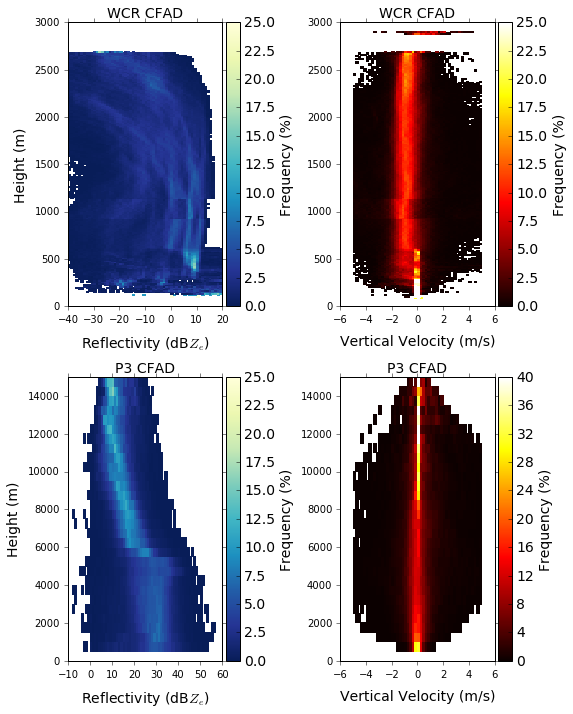

In [7]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
                           vmin=0., vmax=25, y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           vmin=0., vmax=25., y_min=0., y_max = 3000.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           mask_below=.01, ax=ax1W)
cfadp3Z = p3ut.plot_cfad('reflectivity', height_axis=0,
                         xbinsminmax=(-10., 60.), nbinsx=71, plot_percent=True, plot_colorbar=True,
                         vmin=0., vmax=25, y_min=0., y_max = 15000.,
                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                         mask_below=.001, ax=ax2Z)
cfadp3W = p3ut.plot_cfad('Wwind', height_axis=0,
                         xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                         vmin=0., vmax=40, y_min=0., y_max = 15000.,
                         xlab= "Vertical Velocity (m/s)", xpad=10, 
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                         mask_below=.01, ax=ax2W)
figC.tight_layout()

<b>Next we'll make a plot with discrete levels of plotting, by using the <i>discrete_cmap_levels</i> keyword.</b><br>
<i>Note that the second plot applies a mask above 2750 meters to remove the suspect calculation.</i>

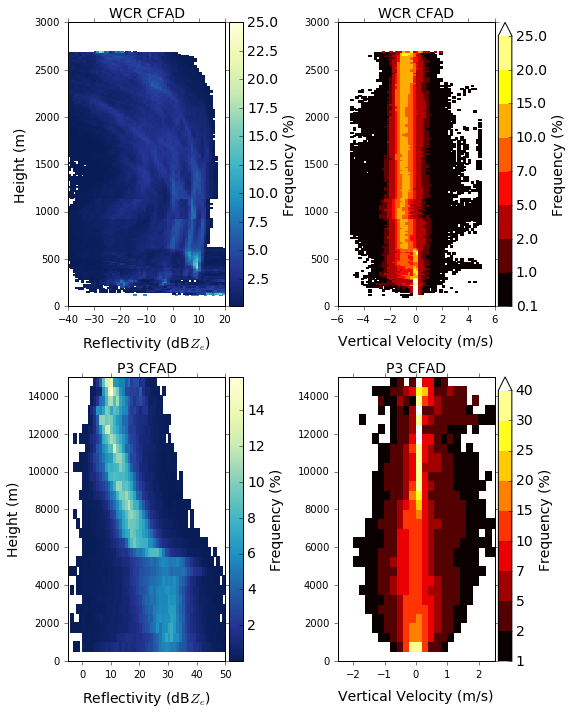

In [9]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

levsWwcr = [.1, 1, 2, 5, 7, 10, 15, 20, 25]
levsWp3 = [1, 2, 5, 7, 10, 15, 20, 25, 30, 40]
cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1, plot_percent=True,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_colorbar=True,
                           vmin=0.1, vmax=25., y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           discrete_cmap_levels=levsWwcr, y_min=0., y_max = 3000.,
                           mask_above_height=2750.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           mask_below=.01, ax=ax1W)
cfadp3Z = p3ut.plot_cfad('reflectivity', height_axis=0, mask_below=.001, #discrete_levels=False,
                         xbinsminmax=(-10., 60.), nbinsx=71, plot_percent=True, plot_colorbar=True,
                         vmin=None, vmax=None,
                         x_min=-5., x_max=50., y_min=0., y_max = 15000.,
                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                         ax=ax2Z)
cfadp3W = p3ut.plot_cfad('Wwind', height_axis=0,
                         xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                         discrete_cmap_levels=levsWp3, x_min=-2.5, x_max=2.5, y_min=0., y_max = 15000.,
                         xlab= "Vertical Velocity (m/s)", xpad=10, 
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                         mask_below=.01, ax=ax2W)
figC.tight_layout()

<b>Let's plot some quantiles of the reflectivity data. Labels are a little quirky, which is why they are turned off in this example.</b>

In [10]:
cfadwcrZ.keys()
print(cfadwcrZ['frequency_percent'].shape, cfadwcrZ['height'].shape, cfadwcrZ['xaxis'].shape, cfadwcrZ['yaxis'].shape)

((190, 60), (190, 60), (190, 61), (190, 61), (190, 61))


/Users/guy/anaconda/lib/python2.7/site-packages/awot-0.2.12-py2.7.egg/awot/graph/radar_utility.py:744: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


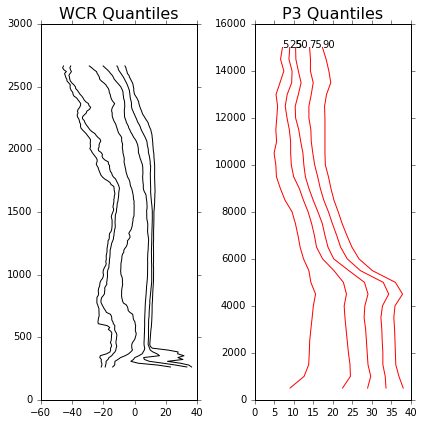

In [9]:
figC, (axq1, axq2) = plt.subplots(1, 2, figsize=(6,6))

quantwcr = wcrut.plot_quantiles('reflectivity', #quantiles=[10, 25, 50, 75, 90],
                                height_axis=1, 
                                start_time=wcrs, end_time=wcre,
                                qcolor='k', qlabels_on=False,
                                qmask_above_height=2750., qmask_below_height=250.,
                                x_min=None, x_max=None, y_min=None, y_max=None,
                                xlab=None, xlabFontSize=None, xpad=None,
                                ylab=None, ylabFontSize=None, ypad=None,
                                title="WCR Quantiles", titleFontSize=None,
                                setup_axes=True, ax=axq1)

quantp3 = p3ut.plot_quantiles('reflectivity', quantiles=[5, 25, 50, 75, 90],
                              height_axis=0,
                              qcolor='r', qlabels_on=True,
#                              qmask_between_height=(6000., 8000.), qmask_below_height=2500.,
                              x_min=None, x_max=None,
                              y_min=None, y_max=None,
                              xlab=None, xlabFontSize=None, xpad=None,
                              ylab=None, ylabFontSize=None, ypad=None,
                              title="P3 Quantiles", titleFontSize=None,
                              setup_axes=True, ax=axq2)
figC.tight_layout()

<b>We can also fill between two quantile values. We use the qfillalpha keyword for transparency on the second plot.</b>

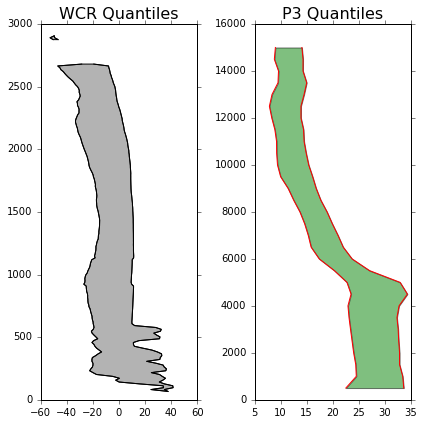

In [10]:
figC, (axq1, axq2) = plt.subplots(1, 2, figsize=(6,6))

fqwcr = wcrut.fill_between_quantiles('reflectivity', quantiles=[10, 25, 50, 75, 90],
                                height_axis=1,
                                qcolor='k', qfillcolor='.7',
#                                qmask_above_height=2750., qmask_below_height=250.,
                                x_min=None, x_max=None, y_min=None, y_max=None,
                                xlab=None, xlabFontSize=None, xpad=None,
                                ylab=None, ylabFontSize=None, ypad=None,
                                title="WCR Quantiles", titleFontSize=None,
                                setup_axes=True, ax=axq1)

fqp3 = p3ut.fill_between_quantiles('reflectivity', quantiles=[25, 75],
                              height_axis=0,
                              qcolor='r', qfillcolor='g', qfillalpha=0.5,
                              x_min=None, x_max=None,
                              y_min=None, y_max=None,
                              xlab=None, xlabFontSize=None, xpad=None,
                              ylab=None, ylabFontSize=None, ypad=None,
                              title="P3 Quantiles", titleFontSize=None,
                              setup_axes=True, ax=axq2)
figC.tight_layout()

<b>We can also overlay the quantiles on top of the CFADs</b>

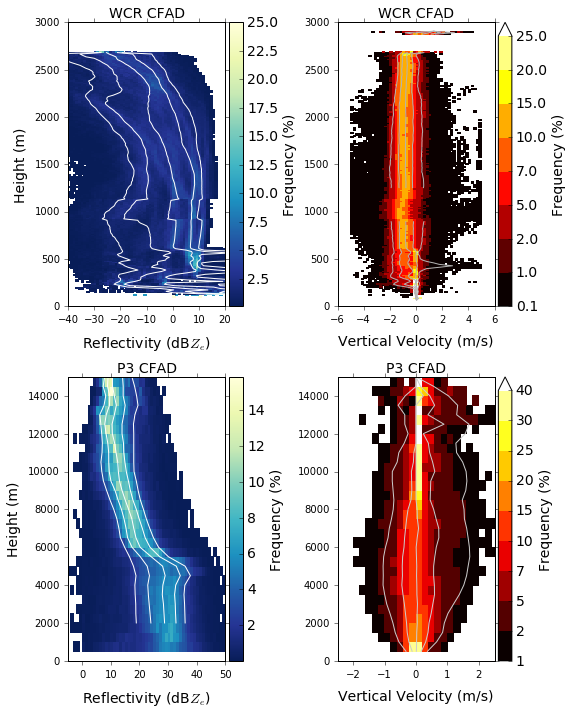

In [11]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

levsWwcr = [.1, 1, 2, 5, 7, 10, 15, 20, 25]
levsWp3 = [1, 2, 5, 7, 10, 15, 20, 25, 30, 40]
cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1, plot_percent=True,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_colorbar=True,
                           vmin=0.1, vmax=25., x_min=-40., x_max=20., y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           quantiles=[10, 25, 50, 75, 90], qcolor='w',
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           discrete_cmap_levels=levsWwcr, y_min=0., y_max = 3000.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           quantiles=[10, 25, 50, 75, 90], qcolor='0.7',
                           qmask_between_height=(900., 1250.),
                           mask_below=.01, ax=ax1W)
cfadp3Z = p3ut.plot_cfad('reflectivity', height_axis=0, mask_below=.001, #discrete_levels=False,
                         xbinsminmax=(-10., 60.), nbinsx=71, plot_percent=True, plot_colorbar=True,
                         vmin=None, vmax=None,
                         x_min=-5., x_max=50., y_min=0., y_max = 15000.,
                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                         quantiles=[10, 25, 50, 75, 90], qcolor='w',
                         qmask_below_height=2000.,
                         ax=ax2Z)
cfadp3W = p3ut.plot_cfad('Wwind', height_axis=0,
                         xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                         discrete_cmap_levels=levsWp3, x_min=-2.5, x_max=2.5, y_min=0., y_max = 15000.,
                         xlab= "Vertical Velocity (m/s)", xpad=10, 
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                         quantiles=[10, 25, 50, 75, 90], qcolor='0.8',
                         mask_below=.01, ax=ax2W)
figC.tight_layout()

<b>Apply the subsetted times listed above. Note P-3 data not plotted because there is no time variable available from the Windsyn analysis.</b>

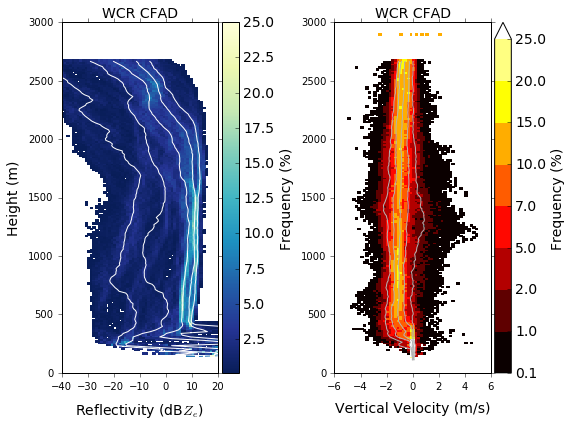

In [12]:
figC, (ax1Z, ax1W) = plt.subplots(1, 2, figsize=(8,6))

levsWwcr = [.1, 1, 2, 5, 7, 10, 15, 20, 25]
levsWp3 = [1, 2, 5, 7, 10, 15, 20, 25, 30, 40]
cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1, plot_percent=True,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_colorbar=True,
                           vmin=0.1, x_min=-40., x_max=20., vmax=25., y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           quantiles=[10, 25, 50, 75, 90], qcolor='w',
                           start_time=wcrs, end_time=wcre,
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           discrete_cmap_levels=levsWwcr, y_min=0., y_max = 3000.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           quantiles=[10, 25, 50, 75, 90], qcolor='0.7',
                           start_time=wcrs, end_time=wcre,
                           mask_below=.01, ax=ax1W)
figC.tight_layout()

<b>We can look at the difference between two CFAD distributions</b><br>
<i>First we retrieve the cfad dictionary calculations for each file.<br>
Second we use these int the plot_cfad_diff method.</i>

In [27]:
wcrf2a = os.path.join("/Users/guy/data/king_air/owles2013/wcr/iop2", "WCR.OWLES13.20131211.180648_184900.up-down.nc")
wcrf2b = os.path.join("/Users/guy/data/king_air/owles2013/wcr/iop2", "WCR.OWLES13.20131211.184901_191544.up-down.nc")
wcrf2c = os.path.join("/Users/guy/data/king_air/owles2013/wcr/iop2", "WCR.OWLES13.20131211.191546_195151.up-down.nc")

#wcrf2a = os.path.join("/Users/guy/data/king_air/owles2013/wcr", "WCR.OWLES13.20131215.225944_234806.up-down.nc")
#wcrf2b = os.path.join("/Users/guy/data/king_air/owles2013/wcr", "WCR.OWLES13.20131215.234808_002411.up-down.nc")
#wcrf2c = os.path.join("/Users/guy/data/king_air/owles2013/wcr", "WCR.OWLES13.20131216.011412_014501.up-down.nc")

wcr2a = awot.io.read_wcr2(fname=wcrf2a)
wcr2b = awot.io.read_wcr2(fname=wcrf2b)
wcr2c = awot.io.read_wcr2(fname=wcrf2c)

wcrut2a = awot.graph.RadarUtilityPlot(wcr2a)
wcrut2b = awot.graph.RadarUtilityPlot(wcr2b)
wcrut2c = awot.graph.RadarUtilityPlot(wcr2c)

height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...
height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...
height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


In [43]:
cfad2awcrZ = wcrut2a.calc_cfad('reflectivity', height_axis=1,
                           xbinsminmax=(-40., 20.), nbinsx=61)

cfad2bwcrZ = wcrut2b.calc_cfad('reflectivity', height_axis=1,
                           xbinsminmax=(-40., 20.), nbinsx=61)

cfad2cwcrZ = wcrut2c.calc_cfad('reflectivity', height_axis=1,
                           xbinsminmax=(-40., 20.), nbinsx=61)

In [44]:
print(cfad2awcrZ.keys())
print(cfad2awcrZ['frequency_points'].shape, cfad2bwcrZ['frequency_points'].shape, cfad2cwcrZ['frequency_points'].shape, cfadwcrZ['frequency_points'].shape)

['frequency_points', 'frequency_percent', 'xaxis', 'yaxis']
((395, 60), (392, 60), (385, 60), (190, 60))


In [45]:
cfad2awcrZ['frequency_points'] = cfad2awcrZ['frequency_points'][3::,:]
cfad2awcrZ['frequency_percent'] = cfad2awcrZ['frequency_percent'][3::,:]
cfad2awcrZ['xaxis'] = cfad2awcrZ['xaxis'][3::]
cfad2awcrZ['yaxis'] = cfad2awcrZ['yaxis'][3::]

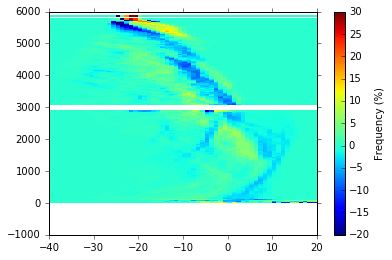

In [46]:
wcrut2a.plot_cfad_diff(cfad2awcrZ, cfad2bwcrZ, plot_percent=True, vmin=-20, vmax=30)

<b>We can retrieve soem vertical profile statistics</b>

In [15]:
vp_statwcrZ = wcrut.calc_vertical_profile('reflectivity', height_axis=1)
vp_statwcrW = wcrut.calc_vertical_profile('velocity', height_axis=1)
vp_statp3Z = wcrut.calc_vertical_profile('reflectivity', height_axis=0)
vp_statp3W = wcrut.calc_vertical_profile('velocity', height_axis=0)

/Users/guy/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [16]:
vp_statwcrZ.keys()

['field',
 'vp_skew',
 'vp_mean',
 'vp_std_dev',
 'vp_max',
 'vp_min',
 'vp_median',
 'vp_variance',
 'yaxis']

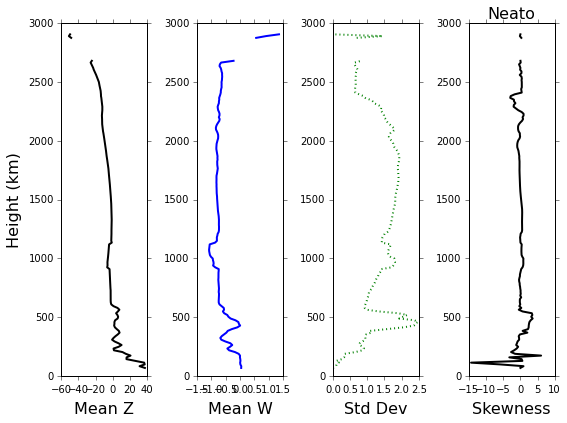

In [21]:
figC, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8,6))

#ax1.plot(vp_statwcrZ['vp_mean'], vp_statwcrZ['yaxis'])
#ax2.plot(vp_statwcrW['vp_mean'], vp_statwcrW['yaxis'])
#ax3.plot(vp_statwcrW['vp_std_dev'], vp_statwcrW['yaxis'])
#ax4.plot(vp_statwcrW['vp_skew'], vp_statwcrW['yaxis'])

wcrut.plot_vp(vp_statwcrZ, 'vp_mean', xlab='Mean Z', ylab='Height (km)', ax=ax1)
wcrut.plot_vp(vp_statwcrW, 'vp_mean', color='b', xlab='Mean W', ax=ax2)
wcrut.plot_vp(vp_statwcrW, 'vp_std_dev', color='g', ls=':', xlab='Std Dev', ax=ax3)
wcrut.plot_vp(vp_statwcrW, 'vp_skew', title='Neato', xlab='Skewness', ax=ax4)
figC.tight_layout()

<b>Create bivariate freqency distributions of Reflectivity-Height. Similar to CFAD. This needs a bit more work and would benefit from the discrete colorbar as well I bet.</b>

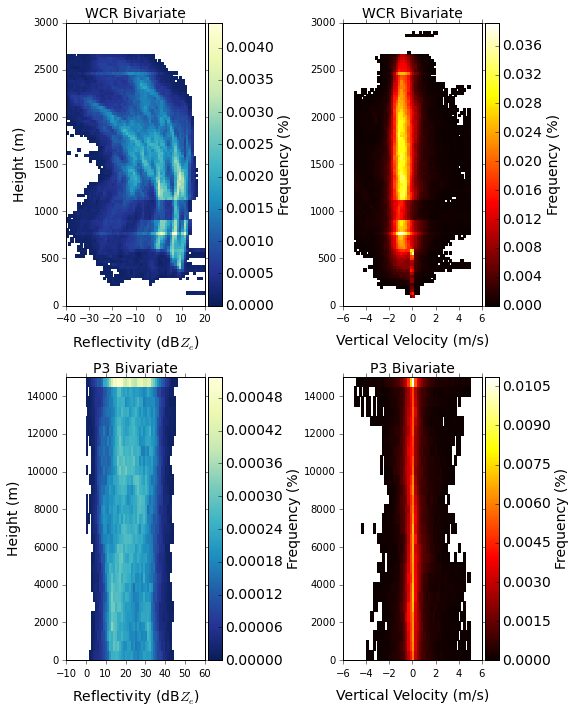

In [17]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

bivwcrZ = wcrut.plot_bivariate_frequency('reflectivity', 'height',
                                         xbinsminmax=(-40., 20.), nbinsx=61,
                                         ybinsminmax=(0., 3000.), nbinsy=100,
                                         plot_percent=True, plot_colorbar=True,
                                         vmin=0., vmax=None, y_min=0., y_max = 3000.,
                                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                                         xlabFontSize=14, ylabFontSize=14,
                                         title="WCR Bivariate", titleFontSize=14,
                                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                                         mask_below=.0001, ax=ax1Z)
bivwcrW = wcrut.plot_bivariate_frequency('velocity', 'height',
                                         xbinsminmax=(-5., 5.), nbinsx=51,
                                         ybinsminmax=(0., 3000.), nbinsy=100,
                                         plot_percent=True, plot_colorbar=True,
                                         vmin=0., vmax=None, y_min=0., y_max = 3000.,
                                         xlab= "Vertical Velocity (m/s)", xpad=10, xlabFontSize=14,
                                         title="WCR Bivariate", titleFontSize=14,
                                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                                         mask_below=.0001, ax=ax1W)
bivp3Z = p3ut.plot_bivariate_frequency('reflectivity', 'height',# mask_below=.001, 
                                       xbinsminmax=(-10., 60.), nbinsx=71,
                                       ybinsminmax=(0., 15000.), nbinsy=30,
                                       plot_percent=True, plot_colorbar=True,
                                       vmin=0., vmax=None, y_min=0., y_max = 15000.,
                                       xlab= "Reflectivity (dB${Z}$$_{e}$)", 
                                       ylab="Height (m)", xpad=10,
                                       xlabFontSize=14, ylabFontSize=14,
                                       title="P3 Bivariate", titleFontSize=14,
                                       cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                                       mask_below=.00001, ax=ax2Z)
bivp3W = p3ut.plot_bivariate_frequency('Wwind', 'height',
                                       xbinsminmax=(-5., 5.), nbinsx=51,
                                       ybinsminmax=(0., 15000.), nbinsy=30,
                                       plot_percent=True, plot_colorbar=True,
                                       vmin=0., vmax=None, y_min=0., y_max = 15000.,
                                       xlab= "Vertical Velocity (m/s)", xpad=10, xlabFontSize=14,
                                       title="P3 Bivariate", titleFontSize=14,
                                       cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                                       mask_below=.00005, ax=ax2W)
figC.tight_layout()